In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline 
%matplotlib notebook
import numpy as np
import os
import random

In [2]:
files = []
datapath = './'
for i in os.listdir(datapath):
    if 'processed2' in i:
        files.append(i)

In [3]:
len(files)

34

In [4]:
files

['actor_rpf_processed2.tsv',
 'arthurian_mythology_&_related_fandoms_processed2.tsv',
 'attack_on_titan_processed2.tsv',
 'bandom_processed2.tsv',
 'bishoujo_senshi_sailor_moon_processed2.tsv',
 'buffy_the_vampire_slayer_processed2.tsv',
 'dcu_processed2.tsv',
 'doctor_who_&_related_fandoms_processed2.tsv',
 'doctor_who_processed2.tsv',
 'dragon_age_all_media_types_processed2.tsv',
 'dragon_age_inquisition_processed2.tsv',
 'dragon_age_video_games_processed2.tsv',
 'haikyuu_processed2.tsv',
 'hamilton_miranda_processed2.tsv',
 'hetalia_axis_powers_processed2.tsv',
 'homestuck_processed2.tsv',
 'internet_personalities_processed2.tsv',
 'k_pop_processed2.tsv',
 'kuroko_no_basuke_processed2.tsv',
 'les_miserables_all_media_types_processed2.tsv',
 'les_miserables_schonberg_boublil_processed2.tsv',
 'ms_paint_adventures_processed2.tsv',
 'music_rpf_processed2.tsv',
 'naruto_processed2.tsv',
 'one_direction_processed2.tsv',
 'original_work_processed2.tsv',
 'rock_music_rpf_processed2.tsv',
 

In [118]:
df = pd.read_csv(datapath + files[0], sep = '\t')
df = df.drop(df.index[[0, 1]])
df = df.apply(lambda x: pd.to_numeric(x, errors='ignore'))
print df['PublishDate'].astype(float).std(ddof=0)

for i in ['Kudos', 'PublishDate']:
    df[i] = (df[i].astype(float) - df[i].astype(float).mean())/df[i].astype(float).std(ddof=0)
df.PublishDate.head(10)

# df = df[['KL', 'Kudos']]

4152.01923479


2    -0.229954
3    -0.132171
4    -0.114348
5    -0.274993
6    -0.094839
7    -0.091708
8    -0.109290
9    -0.162758
10   -0.222488
11   -0.237902
Name: PublishDate, dtype: float64

In [6]:
min_kl = int(min(df.KL.tolist())) -1
max_kl = int(max(df.KL.tolist())) +1
print min_kl, max_kl
kk_dict = {}
for i in range(min_kl, max_kl):
    df_s = df[(df.KL >= i) & (df.KL < i+1)]
    kk_dict[i] = df_s.Kudos.mean()
kk_dict

-2 9


{-2: 0.05888007313297889,
 -1: 0.072229858329797475,
 0: -0.055631081887660819,
 1: -0.13509222997168249,
 2: -0.29075003336785837,
 3: -0.37982446184098778,
 4: -0.42230665434963877,
 5: -0.35954842377982016,
 6: -0.42591199673001257,
 7: -0.45333091695765898,
 8: -0.42498776346391215}

Run on all datasets

In [76]:
def plot_scatter(field):
    names = []
    Kudos_ind_dict_all = {}
    for i in files:
        name = i.split('.')[0].replace('_processed2', '')
        names.append(name)
        df = pd.read_csv(datapath + i, sep = '\t')
        df = df.drop(df.index[[0, 1]])
        df = df.apply(lambda x: pd.to_numeric(x, errors='ignore'))
#         df['KL_squared'] = df['KL']**2
        for i in ['Kudos', field]:
            df[i] = (df[i].astype(float) - df[i].astype(float).mean())/df[i].astype(float).std(ddof=0)
        Kudos_ind_dict = dict(zip(df[field], df['Kudos']))
        Kudos_ind_dict_all[name] = Kudos_ind_dict
#     print Kudos_ind_dict_all.keys()
        
    fig, axs = plt.subplots(6,6, figsize=(30, 20))
    axs = axs.ravel()
    for i in range(0, 34):
        x = sorted(Kudos_ind_dict_all[names[i]].keys())
        y = [Kudos_ind_dict_all[names[i]][j] for j in x]
        axs[i].scatter(x, y, s=5)
#         axs[i].plot(x, y)
        axs[i].set_title(names[i])
    fig.text(0.5, 0.04, 'Chapters', ha='center', va='center')
    fig.text(0.06, 0.5, field, ha='center', va='center', rotation='vertical')
    plt.savefig(field + '_kudos_all.png', format = 'png')
    

In [77]:
df.columns.values

array(['AdditionalTags', 'ArchiveWarnings', 'Author', 'Bookmarks',
       'Category', 'Chapters', 'Characters', 'Fandoms', 'Hits', 'Kudos',
       'Rating', 'Relationship', 'Title', 'UpdateDate', 'Words',
       'Comments', 'CompleteDate', 'PublishDate', 'KL'], dtype=object)

In [81]:
# plot_scatter('Words')

In [101]:
kk_dict_all = {}
names = []
for i in files:
    name = i.split('.')[0].replace('_processed2', '')
    names.append(name)
    df = pd.read_csv(datapath + i, sep = '\t')
    df = df.drop(df.index[[0, 1]])
    df = df.apply(lambda x: pd.to_numeric(x, errors='ignore'))
    for i in ['Kudos', 'KL']:
        df[i] = (df[i].astype(float) - df[i].astype(float).mean())/df[i].astype(float).std(ddof=0)
    min_kl = int(min(df.KL.tolist())) -1
    max_kl = int(max(df.KL.tolist())) +1
    kk_dict = {}
    for i in np.arange(min_kl, max_kl, 0.5):
        df_s = df[(df.KL >= i) & (df.KL < i+0.5)]
        kk_dict[i] = bootstrap_resample(df_s.Kudos.tolist())
    kk_dict_all[name] = kk_dict

In [100]:
def bootstrap_resample(li):
    if len(li) > 0:
        ave_original = np.average(li)
        aves = []
        for i in range(1000):
            sample = []
            for i in range(len(li)):
                sample.append(random.choice(li))
            aves.append(np.average(sample))
        tail = sorted(aves)[24]
        head = sorted(aves)[970]
    else:
        ave_original = 0
        tail = 0
        head = 0
    return (ave_original, tail, head)

<IPython.core.display.Javascript object>


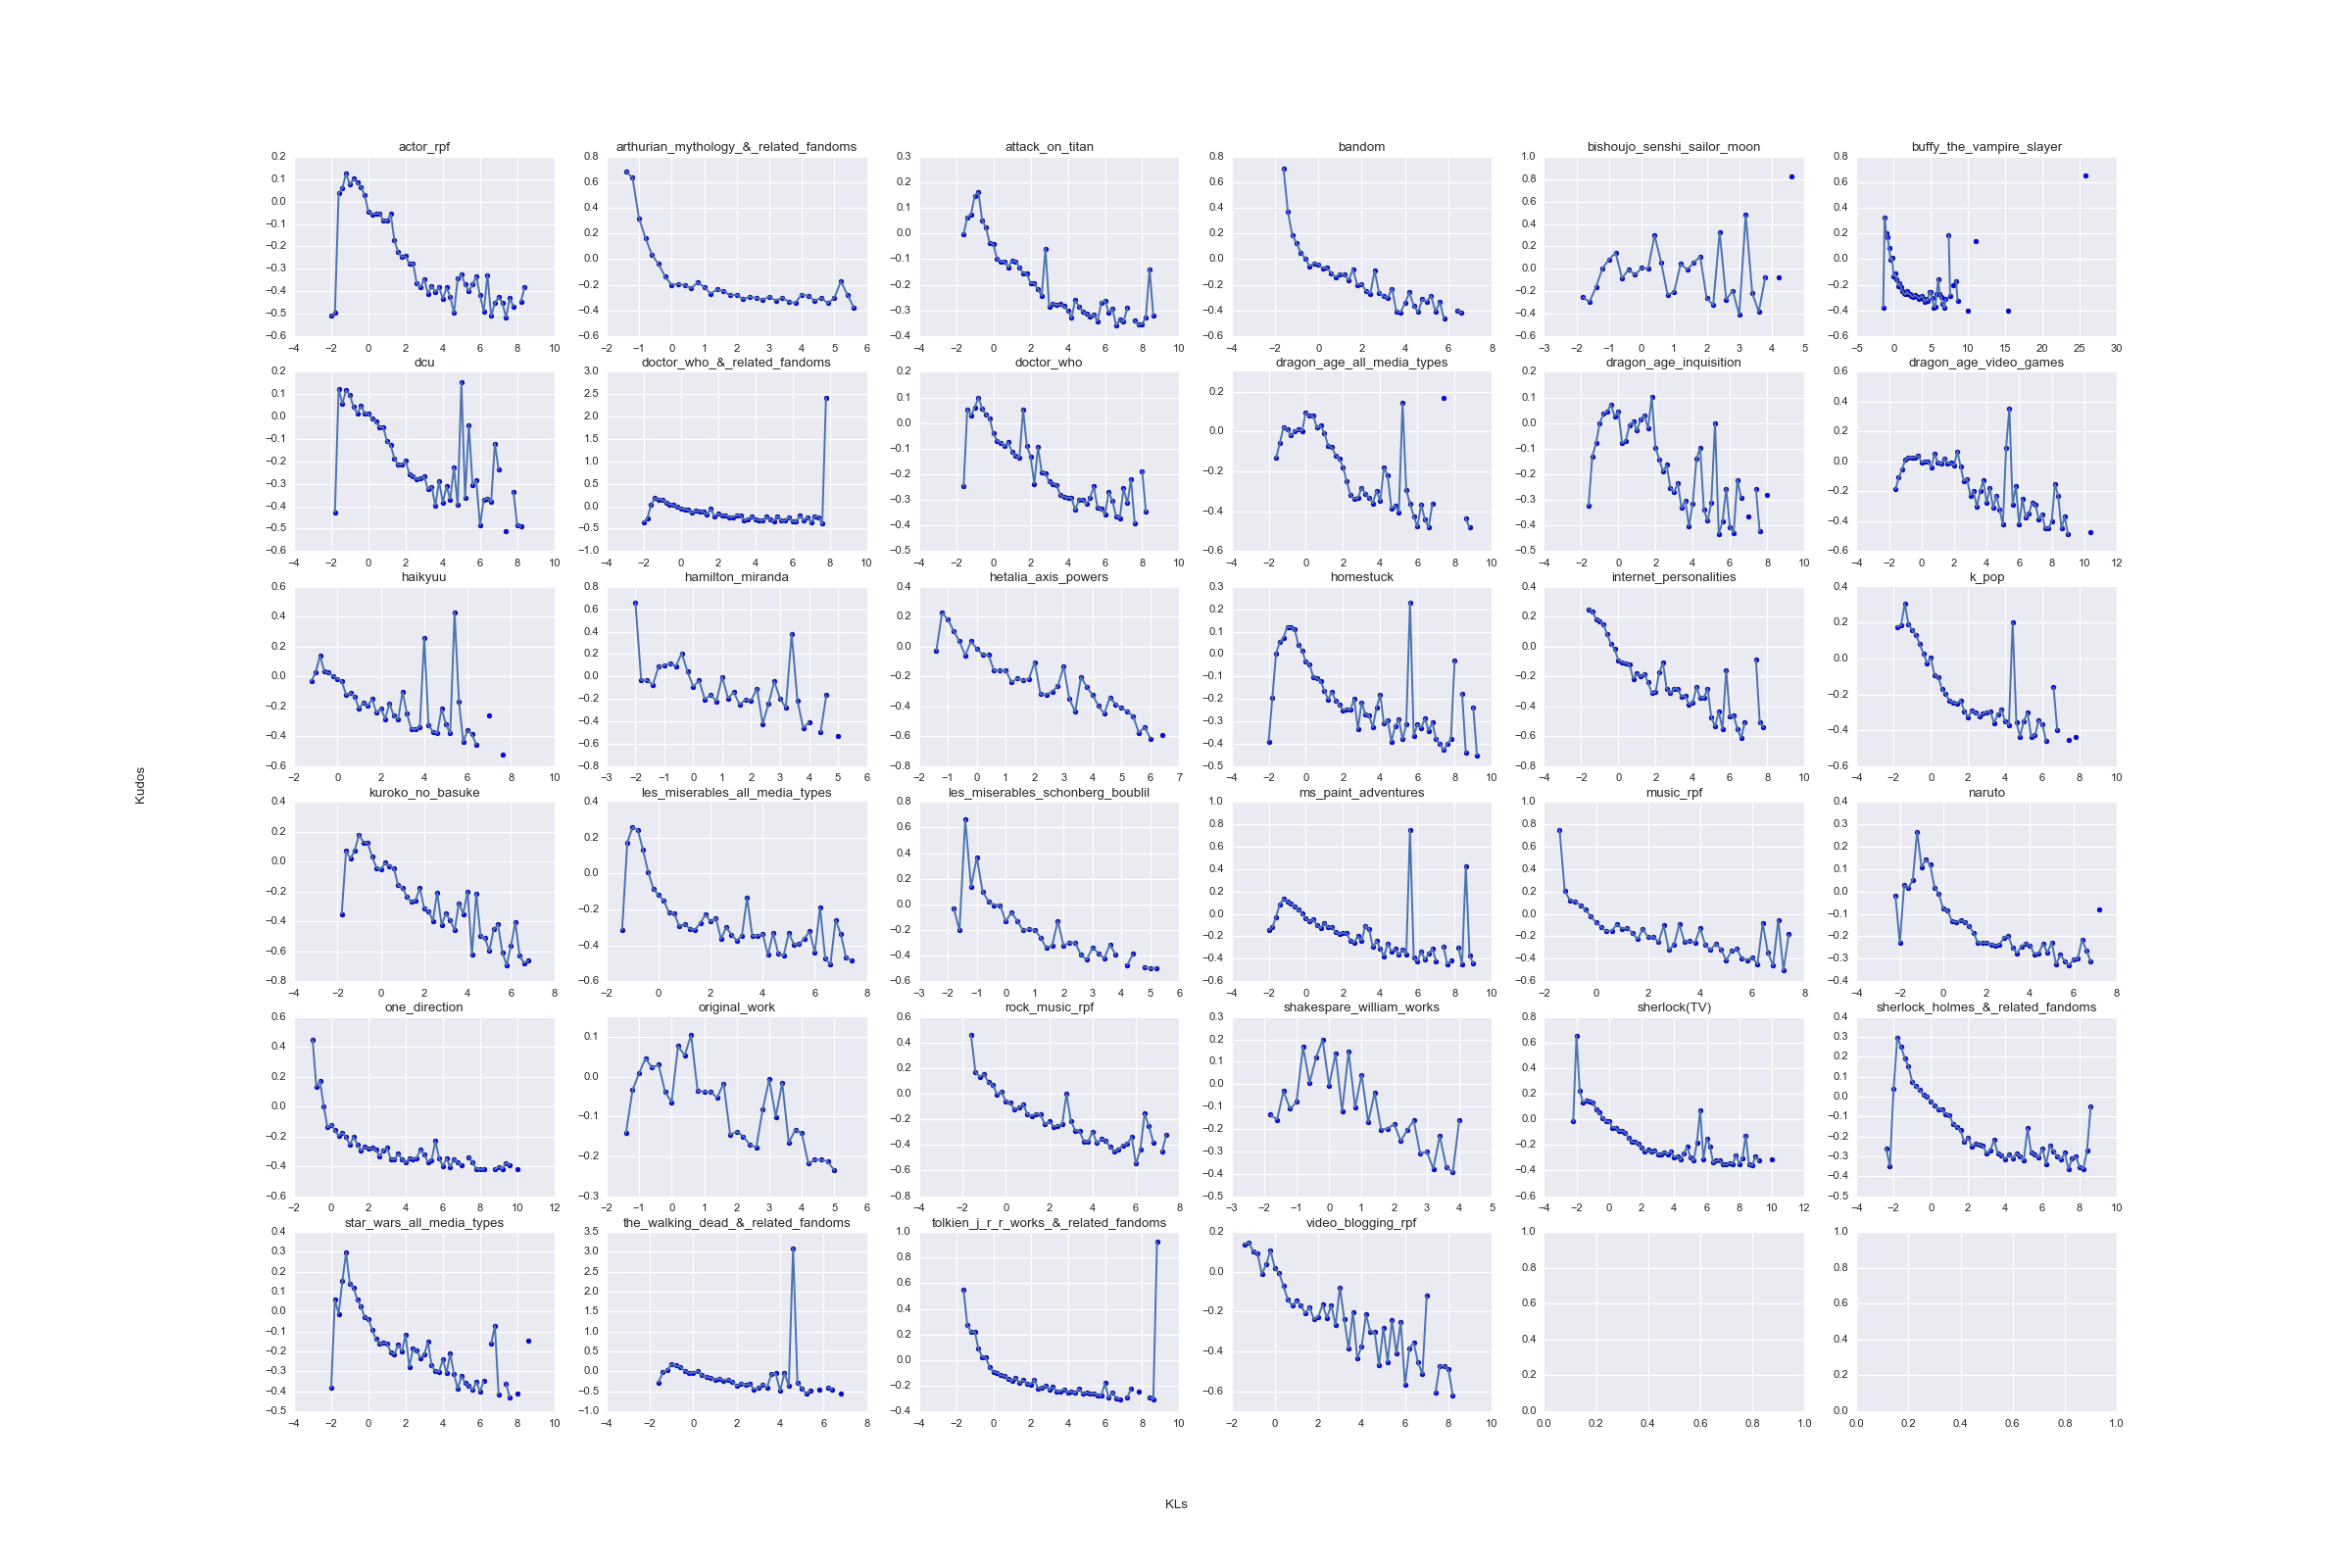

In [41]:
fig, axs = plt.subplots(6,6, figsize=(30, 20))
axs = axs.ravel()

for i in range(0, 34):
    x = sorted(kk_dict_all[names[i]].keys())
    y = [kk_dict_all[names[i]][j] for j in x]
    axs[i].scatter(x, y)
    axs[i].plot(x, y)
    axs[i].set_title(names[i])
#     axs[i].set_xlim([min(x) -1, max(x) + 1])
#     axs[i].set_ylim([min(y) -0.2, max(y) + 0.2])

fig.text(0.5, 0.04, 'KLs', ha='center', va='center')
fig.text(0.06, 0.5, 'Kudos', ha='center', va='center', rotation='vertical')
plt.savefig('kl_kudos_all_bin0_2—.png', format = 'png')


# ax.set_yscale('log')
# ax.set_ylim([0.180, 0.225])

<IPython.core.display.Javascript object>


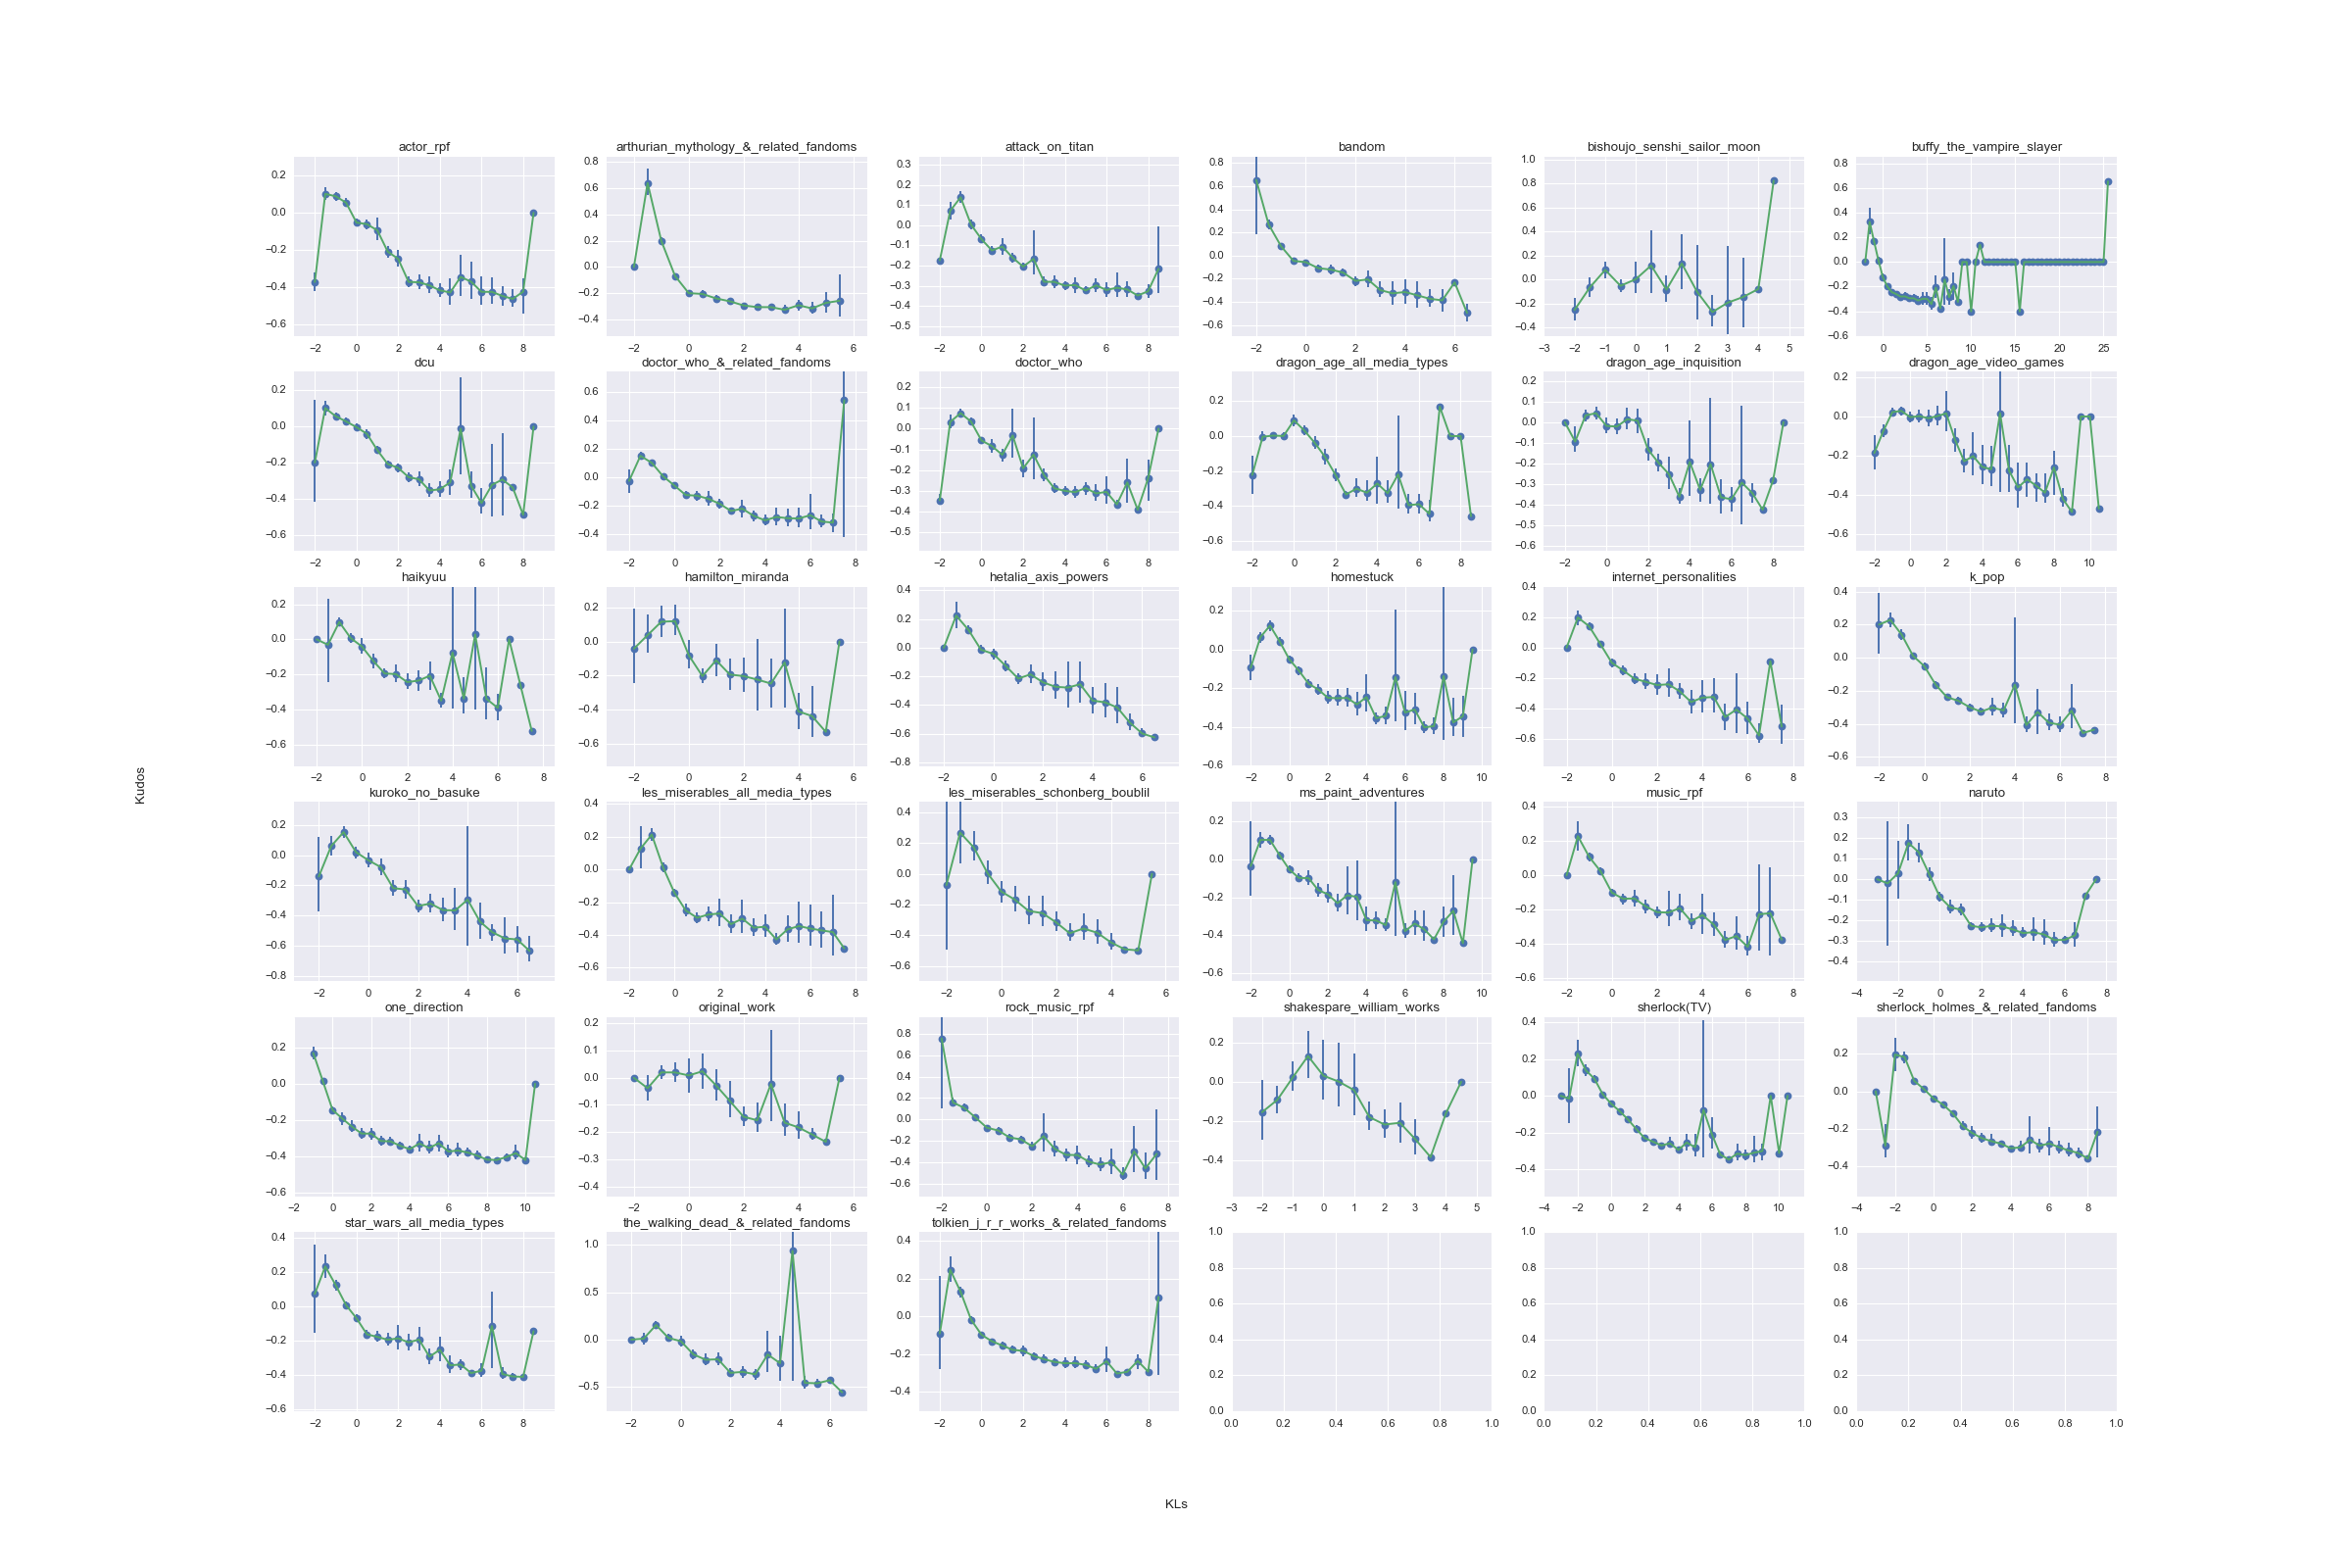

[-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5]
[-0.37269058335104721, 0.10225817368867164, 0.089719539963759615, 0.054942768202131398, -0.05243471010601803, -0.060984317722532502, -0.094175554551252191, -0.2092054533747261, -0.24800380250307222, -0.37224890259449217, -0.37436031899863242, -0.39091345760929747, -0.41795407647557431, -0.42918980075513624, -0.34550370257927421, -0.37108515905169709, -0.42587348701059174, -0.42595400733301719, -0.44801657567758152, -0.46395959951781413, -0.42498776346391215, 0]
[-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5]
[0, 0.64037775122409268, 0.1997434472575137, -0.067672995288884388, -0.19903750708895593, -0.20534209013124241, -0.23952247418088171, -0.26119441383260183, -0.29301503543303603, -0.30553456150736336, -0.3058889568866493, -0.32588889791315845, -0.29143588270716669, -0.31550209432351939, -0.27344349622699898, -0.25723836052221771]
[-2

In [105]:
fig, axs = plt.subplots(6,6, figsize=(30, 20))
axs = axs.ravel()

# cnt = 0
for i in range(0, 33):
    x = sorted(kk_dict_all[names[i]].keys())
    y = [kk_dict_all[names[i]][j][0] for j in x]
    print x
    print y
#     cnt += 1
#     if cnt == 5:
#         break

    lower_error = [kk_dict_all[names[i]][j][0]-kk_dict_all[names[i]][j][1] for j in x]
    upper_error = [kk_dict_all[names[i]][j][2]-kk_dict_all[names[i]][j][0] for j in x]
    asymmetric_error = [lower_error, upper_error]

    axs[i].errorbar(x, y, yerr=asymmetric_error,fmt='o')
    axs[i].plot(x, y)
    axs[i].set_title(names[i])
    axs[i].set_xlim([min(x) -1, max(x) + 1])
    axs[i].set_ylim([min(y) -0.2, max(y) + 0.2])

fig.text(0.5, 0.04, 'KLs', ha='center', va='center')
fig.text(0.06, 0.5, 'Kudos', ha='center', va='center', rotation='vertical')
plt.savefig('kl_squared_kudos_all_bin_0_5_ave_errorbar.png', format = 'png')

# ax.set_yscale('log')


### 